In [11]:
import re
import matplotlib.pyplot as plt
import numpy as np
import os

In [12]:
def get_file_paths(directory):
    file_paths = []  # Initialize an empty list to store file paths

    # Iterate through files in the specified directory
    for file_name in os.listdir(directory):
        # Construct full path
        full_path = os.path.join(directory, file_name)
        # Ensure it's a file (not a directory) before appending
        if os.path.isfile(full_path):
            file_paths.append(full_path)

    return file_paths
    

# List of file paths for all four files
#file_paths = [
#    '../Experiments/Experiment_1/Experiment_11-12-2024-16-29-34',
#    '../Experiments/Experiment_1/Experiment_11-12-2024-17-13-24',
#    '../Experiments/Experiment_1/Experiment_11-12-2024-17-52-38',
#    '../Experiments/Experiment_1/Experiment_11-12-2024-18-29-01'
#]

directory = '../Experiments/Experiment_13/'
file_paths = get_file_paths(directory)
print(file_paths)
# Initialize lists to store the extracted values
energy_computation_list = []
energy_communication_list = []
total_energy_list = []
num_communications_list = []

# Loop through each file and extract the relevant values
for file_path in file_paths:
    with open(file_path, 'r') as file:
        content = file.read()

    # Extract energy computation values
    energy_computation = re.findall(r'Energy Computation:\s*([0-9]*\.?[0-9]+)', content)
    energy_computation_list.append([float(value) for value in energy_computation])
    
    # Extract energy communication values
    energy_communication = re.findall(r'Energy Communication:\s*([0-9]*\.?[0-9]+)', content)
    energy_communication_list.append([float(value) for value in energy_communication])

    # Extract total energy values
    total_energy = re.findall(r'Total Energy:\s*([0-9]*\.?[0-9]+)', content)
    total_energy_list.append([float(value) for value in total_energy])

    # Extract number of communications
    num_communications = re.findall(r'Number of communications:\s*(\d+)', content)
    num_communications_list.append([int(value) for value in num_communications])

# Print all extracted lists
#print("Energy Computation List:", energy_computation_list)
#print("Energy Communication List:", energy_communication_list)
#print("Total Energy List:", total_energy_list)
#print("Number of Communications List:", num_communications_list)


['../Experiments/Experiment_13/Experiment_12-12-2024-16-27-00', '../Experiments/Experiment_13/Experiment_12-12-2024-17-14-46', '../Experiments/Experiment_13/Experiment_12-12-2024-18-36-53', '../Experiments/Experiment_13/Experiment_12-12-2024-17-57-10']


In [13]:
def calculate_average(lst):
    #print(lst)
    if lst:  # Check if the list is not empty
        return round(sum(lst) / len(lst), 2)
    return 0  # Return 0 if the list is empty

# Create a new list for average values
average_energy_computation = [calculate_average(sublist) for sublist in energy_computation_list]
average_energy_communication = [calculate_average(sublist) for sublist in energy_communication_list]
average_energy_total = [round(a + b, 2) for a, b in zip(average_energy_computation, average_energy_communication)]


# Print the result
print("Average Energy Computation:", average_energy_computation)
print("Average Energy Communication:", average_energy_communication)
print("Average Energy Total:", average_energy_total)

Average Energy Computation: [1.7, 1.7, 1.7, 1.7]
Average Energy Communication: [2229.59, 1114.8, 222.96, 445.92]
Average Energy Total: [2231.29, 1116.5, 224.66, 447.62]


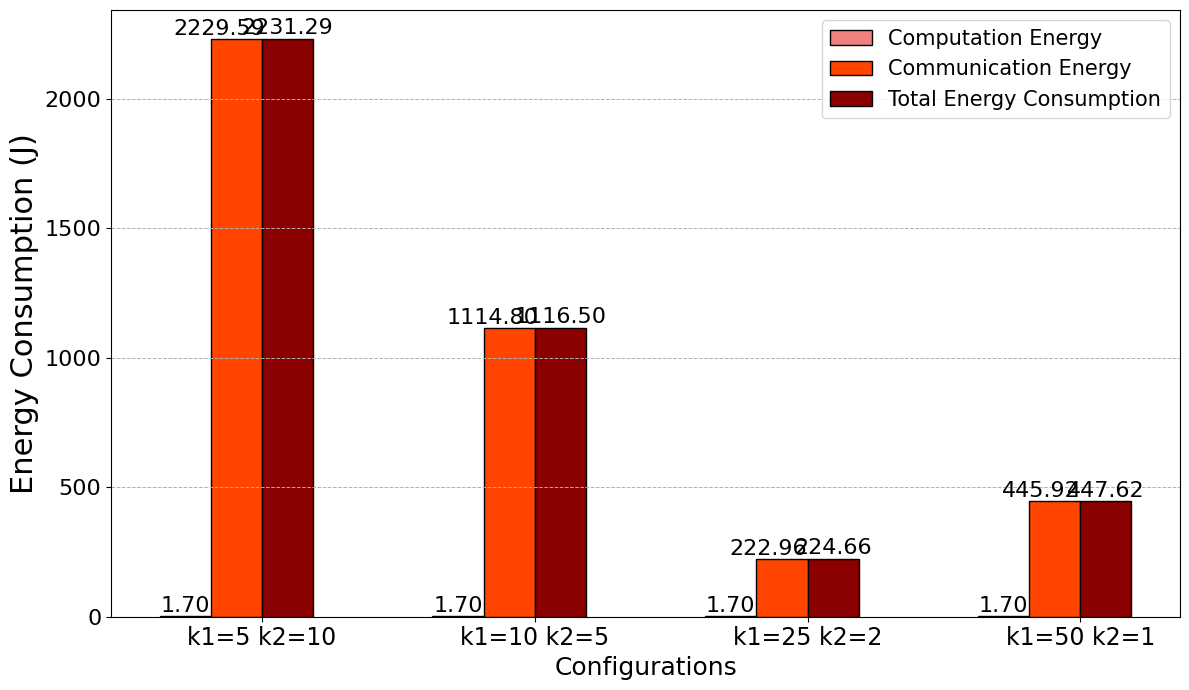

In [14]:
labels = ['k1=5 k2=10', 'k1=10 k2=5', 'k1=25 k2=2', 'k1=50 k2=1']

bar_width = 0.15  # Width of each bar
index = np.arange(len(labels)) * 0.8  # Reduced multiplier for less space between categories

# Create figure and main axis
fig, ax1 = plt.subplots(figsize=(12, 7))

# Add bars for each type of energy consumption
bars1 = ax1.bar(index - 1.5*bar_width, average_energy_computation, bar_width, label='Computation Energy', color='lightcoral', edgecolor='black')
bars2 = ax1.bar(index - 0.5*bar_width, average_energy_communication, bar_width, label='Communication Energy', color='orangered', edgecolor='black')
bars3 = ax1.bar(index + 0.5*bar_width, average_energy_total, bar_width, label='Total Energy Consumption', color='darkred', edgecolor='black')

# Label positions (customizable) - Each entry corresponds to a specific bar's (x_offset, y_offset)
label_positions = {
    'energy_computation':   [(0, 0.5), (0, 0.5), (0, 0.5), (0, 0.5)],   # Horizontal and vertical offsets for computation bars
    'energy_communication': [(-0.05, 0), (-0.05, 0), (-0.04, 0), (-0.04, 0)],  # Offsets for communication energy bars
    'total_energy':         [(0, 2), (0, 2), (0, 1), (0, 1)]      # Offsets for total energy bars
}

# Settings for the left y-axis (energy consumption)
ax1.set_xlabel('Configurations', fontsize=18)
ax1.set_ylabel('Energy Consumption (J)', fontsize=22)
ax1.set_xticks(index)
ax1.set_xticklabels(labels, fontsize=17)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7, axis='y')

# Add labels on top of each bar for energy
for i, bar in enumerate(bars1):  # Computation Energy Bars
    yval = bar.get_height()
    x_offset, y_offset = label_positions['energy_computation'][i]
    ax1.text(
        bar.get_x() + bar.get_width() / 2 + x_offset,
        yval + y_offset,
        f'{yval:.2f}',
        ha='center',
        va='bottom',
        fontsize=16
    )

for i, bar in enumerate(bars2):  # Communication Energy Bars
    yval = bar.get_height()
    x_offset, y_offset = label_positions['energy_communication'][i]
    ax1.text(
        bar.get_x() + bar.get_width() / 2 + x_offset,
        yval + y_offset,
        f'{yval:.2f}',
        ha='center',
        va='bottom',
        fontsize=16
    )

for i, bar in enumerate(bars3):  # Total Energy Bars
    yval = bar.get_height()
    x_offset, y_offset = label_positions['total_energy'][i]
    ax1.text(
        bar.get_x() + bar.get_width() / 2 + x_offset,
        yval + y_offset,
        f'{yval:.2f}',
        ha='center',
        va='bottom',
        fontsize=16
    )



# Increase font size for y-axis tick labels
ax1.tick_params(axis='y', labelsize=16)
#ax2.tick_params(axis='y', labelsize=16)

# Combine legends into one
handles1, labels1 = ax1.get_legend_handles_labels()
#handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles=handles1, labels=labels1, loc='upper right', fontsize=15)

# Show plot
plt.tight_layout()
plt.show()
